# Lectura y graficación de una señal almacenada en un archivo txt

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

## Abrimos el archivo txt para ver  el contenido

In [2]:
f = open("ciclosojos.txt","r")
raw_data = f.read()  # con f.read() leemos todo el contenido
f.close()

raw_data

'# OpenSignals Text File Format. Version 1\n# {"98:D3:71:FD:62:1E": {"position": 0, "device": "bitalino_rev", "device name": "98:D3:71:FD:62:1E", "device connection": "BTH98:D3:71:FD:62:1E", "sampling rate": 1000, "resolution": [4, 1, 1, 1, 1, 10], "firmware version": 1282, "comments": "", "keywords": "", "mode": 0, "sync interval": 2, "date": "2023-4-19", "time": "11:51:51.600", "channels": [4], "sensor": ["EEGBITREV"], "label": ["A4"], "column": ["nSeq", "I1", "I2", "O1", "O2", "A4"], "special": [{}], "digital IO": [0, 0, 1, 1]}}\n# EndOfHeader\n0\t0\t0\t0\t0\t539\t\n1\t0\t0\t0\t0\t564\t\n2\t0\t0\t0\t0\t576\t\n3\t0\t0\t0\t0\t581\t\n4\t0\t0\t0\t0\t584\t\n5\t0\t0\t0\t0\t585\t\n6\t0\t0\t0\t0\t591\t\n7\t0\t0\t0\t0\t588\t\n8\t0\t0\t0\t0\t577\t\n9\t0\t0\t0\t0\t561\t\n10\t0\t0\t0\t0\t526\t\n11\t0\t0\t0\t0\t483\t\n12\t0\t0\t0\t0\t442\t\n13\t0\t0\t0\t0\t402\t\n14\t0\t0\t0\t0\t381\t\n15\t0\t0\t0\t0\t379\t\n0\t0\t0\t0\t0\t387\t\n1\t0\t0\t0\t0\t398\t\n2\t0\t0\t0\t0\t414\t\n3\t0\t0\t0\t0\t440\t\n

In [3]:
## Expresion regular para buscar automaticamente el contenido de un numero dentro de un string
x = re.findall("[0-5][0-9]\d", raw_data)

print(x)


['100', '128', '202', '539', '564', '576', '581', '584', '585', '591', '588', '577', '561', '526', '483', '442', '402', '381', '379', '387', '398', '414', '440', '467', '478', '471', '455', '440', '420', '398', '384', '371', '359', '357', '359', '376', '391', '414', '425', '428', '436', '437', '421', '400', '386', '372', '360', '342', '311', '281', '266', '252', '260', '282', '295', '312', '332', '353', '373', '392', '399', '388', '374', '353', '330', '320', '316', '307', '321', '340', '356', '365', '366', '379', '399', '408', '398', '384', '369', '357', '337', '308', '268', '237', '230', '228', '240', '272', '312', '350', '373', '402', '434', '456', '465', '458', '438', '415', '388', '370', '355', '342', '355', '368', '379', '402', '421', '432', '432', '434', '437', '423', '391', '373', '349', '316', '294', '280', '295', '315', '342', '370', '404', '443', '476', '492', '499', '486', '452', '423', '378', '335', '300', '286', '286', '311', '358', '416', '474', '518', '556', '585', '591'

In [4]:
Fs = 1000
Ts=1/Fs

print(f" Fs={Fs} hz\n Ts={Ts} s")

 Fs=1000 hz
 Ts=0.001 s


## Leemos el archivo excluyendo las 2 primeras filas del archivo

In [5]:
array = np.genfromtxt("ciclosojos.txt", delimiter="\t",skip_header = 3)
array

array([[  0.,   0.,   0., ...,   0., 539.,  nan],
       [  1.,   0.,   0., ...,   0., 564.,  nan],
       [  2.,   0.,   0., ...,   0., 576.,  nan],
       ...,
       [  3.,   0.,   0., ...,   0., 408.,  nan],
       [  4.,   0.,   0., ...,   0., 415.,  nan],
       [  5.,   0.,   0., ...,   0., 433.,  nan]])

## Ploteamos la lectura

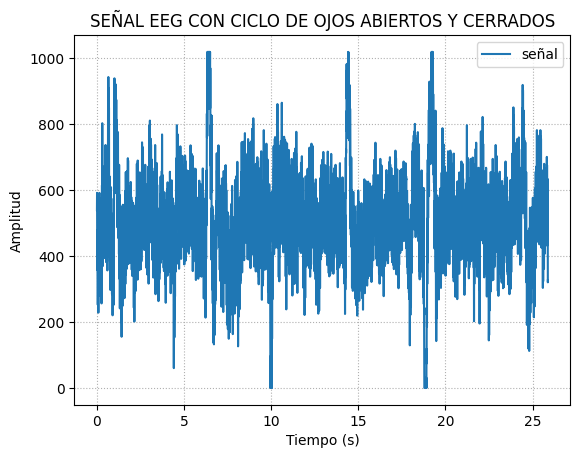

In [6]:
arr = []
for i in range(int(len(array[:,-2])/2) ):
    arr.append(i/Fs)
               
plt.plot(arr , array[:int(len(array[:,-2]) /2),-2], label="señal")      # graficamos la señal
plt.grid(linestyle=":")
plt.title("SEÑAL EEG CON CICLO DE OJOS ABIERTOS Y CERRADOS")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend(loc="upper right")
plt.show()


## La forma de sabes la frecuencia de la señal es viendo en el dominio de la frecuencia

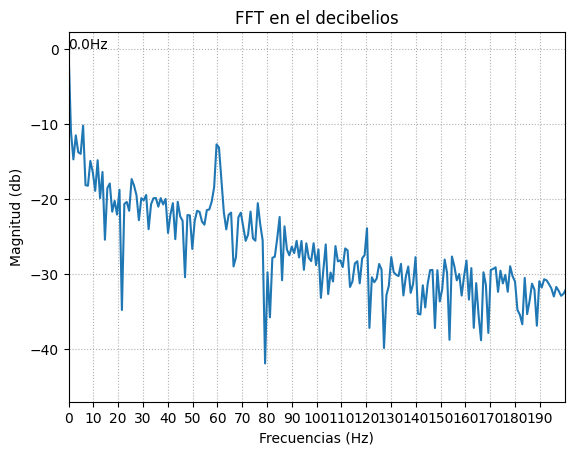

In [7]:
N = 2**10                                     # 10 bits, 0-1023

signal1 = array[:,-2]

signal_fft = np.fft.fft(signal1, N)           # fft magtinud
signal_fft = np.round(np.abs(signal_fft),3)[0:N//2] # nos quedamos con los componente de la derecha de la FFT
signal_aux = signal_fft/signal_fft.max()     # hallamos el maximo para pasar la magnitud a escala db

with np.errstate(divide='ignore'):
    signal_fft_db = 10*np.log10(signal_aux)  # , out=signal_aux, where=signal_aux >= 0 para evitar division por zero

F_list = np.linspace(0,Fs/2, N//2)
F = np.round(F_list[np.argmax(signal_fft_db)], 1)   # argmax, encuentra el argumento max en un array

plt.plot(F_list, signal_fft_db)  #10 * np.log10(P / Pref) , decibelios
plt.text(F,0, f"{F}Hz")
plt.grid(linestyle=":")
plt.ylabel("Magnitud (db)")
plt.xlabel("Frecuencias (Hz)")
plt.title("FFT en el decibelios")
plt.xlim([0,200])
plt.xticks(np.arange(0,200,10))
plt.show()